In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./kabitakitchen.csv',encoding='Latin-1')

In [3]:
df

,id,commentText,Labels
0,Ugy_CBm-_CKA3YqrzcB4AaABAg,Pudina ptta nhi dalu to,7
1,Ugy9mx9nuTWJu4dRac14AaABAg,Chiken kacha tu ni rhy ga sis,7
2,Ugz8T2MKLYucL3dM9nh4AaABAg,"Hello mam, I love your all recipes.... ðð...",4
3,Ugx_1cCjRbCaDgL0FLF4AaABAg,Its awesome recipe plzz make handi chicken in ...,2
4,UgzLhKVAJ6NN3nZXyjN4AaABAg,Yeh jo measurement hai.........kitne logon ke ...,7
...,...,...,...
4895,UgjFXyC0Qhzk5ngCoAEC,i love chole...thank you kabitaji for sharing ...,1
4896,UghP3bitlJuM13gCoAEC,thnakyou mm,1
4897,UghztLZOqvedfXgCoAEC,thanks mam,1
4898,UggX5Fi2Y430zXgCoAEC,u r fabulous,4


In [4]:
df=df.drop('id',axis=1)

In [5]:
df

,commentText,Labels
0,Pudina ptta nhi dalu to,7
1,Chiken kacha tu ni rhy ga sis,7
2,"Hello mam, I love your all recipes.... ðð...",4
3,Its awesome recipe plzz make handi chicken in ...,2
4,Yeh jo measurement hai.........kitne logon ke ...,7
...,...,...
4895,i love chole...thank you kabitaji for sharing ...,1
4896,thnakyou mm,1
4897,thanks mam,1
4898,u r fabulous,4


In [168]:
df.describe(include='all')

,commentText,Labels
count,4900,4900.000000
unique,4309,NaN
top,Nice,NaN
freq,93,NaN
mean,NaN,4.000000
std,NaN,2.000204
min,NaN,1.000000
25%,NaN,2.000000
50%,NaN,4.000000
75%,NaN,6.000000


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   commentText  4900 non-null   object
 1   Labels       4900 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 76.7+ KB


In [170]:
# df.duplicated().sum()

In [171]:
# df=df.drop_duplicates()

In [ ]:
# df.duplicated().sum()

In [ ]:
# df=df.reset_index()

In [172]:
df.shape

(4900, 2)

In [6]:
#preprocess the text,lower text,stemming text,stopword remove in text using cleantext,nltk
from cleantext import clean

import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords


stops=set(stopwords.words('english'))

def text_clean(text):
    cleanText=clean(
        text,
        lower=True,
        no_emoji=True,
        no_line_breaks=True,
        fix_unicode=True,
        strip_lines=True
        )
    words=word_tokenize(cleanText) 
    words=[word for word in words if word.isalnum()] #return only alpha numeric value
    stemm=SnowballStemmer("english")
    words=[stemm.stem(word) for word in words if not word in stops]
    cleanText=" ".join(words)
    return cleanText


In [7]:
df['commentText']=df['commentText'].apply(text_clean)

In [8]:
df[:50]

,commentText,Labels
0,pudina ptta nhi dalu,7
1,chiken kacha tu ni rhi ga sis,7
2,hello mam love recip ingredi easili avail way ...,4
3,awesom recip plzz make handi chicken handi,2
4,yeh jo measur hai kitn logon ke liy hai,7
5,kabita mam tri ur egg biryani everyon hous lov...,5
6,cooker kar sakt na,7
7,mujh bhot ach lagi apki respi mene subscrib ka...,2
8,mam dahi k jgh p kuch use kr skte h kya,7
9,wooooooo yummmmmm love,5


In [148]:
df[150:200]

,commentText,Labels
150,biryani ka time nhi samjha,6
151,kitina bhi jayada biriyani ho time rahega na p...,7
152,agar tawa nahi hai direct heat kar sakt hai,7
153,hii mam mera biryani bht acha bna bt chckn hlk...,7
154,bahot best,3
155,thanx mam biryani famili love much,5
156,pudina patta na ho kadi ptta use kr sakt h,7
157,man dahi ko replac kark kuch aur nhi daal sakt,7
158,awesom recip thank much,5
159,love content keep good work,4


In [199]:
custom_hindi_stops=[
    "aadi", "aaj", "aap", "aapn", "aata", "aati", "aaya", "aay", "ab", "abb",
    "abbey", "abe", "abhi", "accha", "acha", "achcha", "agar", "aint", "aisa", "ais",
    "aisi", "alag", "andar", "ap", "apan", "apna", "apnaa", "apn", "apni", "aur", "avum",
    "aya", "aye", "baad", "baar", "bad", "bahut", "bana", "banai", "banao", "banaya",
    "banay", "banayi", "banda", "band", "bandi", "bane", "bani", "ba", "bata", "batao",
    "bhai", "bheetar", "bhi", "bhitar", "bht", "bilkul", "bohot", "bol", "bola", "bole",
    "boli", "bolo", "bolta", "bolt", "bolti", "bro", "btw", "caus", "chahiy", "chaiy",
    "chal", "chalega", "chhaiy", "clearli", "com", "de", "dede", "dega", "degi", "dekh",
    "dekha", "dekh", "dekhi", "dekho", "deng", "dhang", "di", "dijiy", "diya", "diyaa",
    "diy", "diyo", "doosra", "doosr", "dunga", "dungi", "dusra", "dusr", "dusri", "dvaara",
    "dvara", "dwaara", "dwara", "edu", "eg", "ek", "etc", "fr", "gaya", "gay", "gayi",
    "ghar", "haan", "hai", "hain", "hamara", "hamar", "hamari", "hamn", "han", "har",
    "hardli", "hi","hoga", "hoge", "hogi", "hona", "honaa", "hone", "hong", "hongi", "honi",
    "hota", "hotaa", "hote", "hoti", "hoyeng", "hoyengi", "hu", "hua", "hue", "huh",
    "hui", "hum", "humein", "humn", "hun", "huy", "huyi", "ie", "imo", "inasmuch", "inc",
    "inh", "inhi", "inho", "inka", "inkaa", "ink", "inki", "inn", "inner", "ins",
    "insofar", "ise", "isi", "iska", "iskaa", "isk", "iski", "ism", "isnt", "iss", "iss",
    "issi", "isski", "itna", "itn", "itni", "itno", "ityaadi", "ityadi", "ja", "jaa",
    "jab", "jabh", "jaha", "jahaan", "jahan", "jaisa", "jais", "jaisi", "jata", "jayega",
    "jidhar", "jin", "jinh", "jinhi", "jinho", "jinhon", "jinka", "jink", "jinki", "jinn",
    "ji", "jise", "jiska", "jisk", "jiski", "jism", "jiss", "jiss", "jitna", "jitn",
    "jitni", "jo", "jyaada", "jyada", "ka", "kaafi", "kab", "kabhi", "kafi", "kaha",
    "kahaa", "kahaan", "kahan", "kahi", "kahin", "kaht", "kaisa", "kais", "kaisi", "kal",
    "kam", "kar", "kara", "kare", "karega", "karegi", "karen", "kareng", "kari", "kark",
    "karna", "karn", "karni", "karo", "karta", "kart", "karti", "karu", "karun", "karunga",
    "karungi", "kaun", "kaunsa", "kayi", "kch", "ke", "keh", "keht", "kept", "khud",
    "ki", "kin", "kine", "kinh", "kinho", "kinka", "kink", "kinki", "kinko", "kinn",
    "kino", "ki", "kise", "kisi", "kiska", "kisk", "kiski", "kisko", "kisliy", "kisn",
    "kitna", "kitn", "kitni", "kitno", "kiya", "kiy", "ko", "koi", "kon", "konsa",
    "koyi", "krna", "krne", "kuch", "kuchch", "kuchh", "kul", "kull", "kya", "kyaa",
    "kyu", "kyuki", "kyun", "kyunki", "lagta", "lagt", "lagti", "le", "lekar", "lekin",
    "lest", "li", "liya", "liy", "lo", "log", "logon", "lol", "ltd", "lunga", "maan",
    "maana", "maan", "maani", "maano", "magar", "mai", "main", "main", "mainli", "mana",
    "mane", "mani", "mano", "mani", "mat", "mein", "mera", "mere", "mere", "meri",
    "mil", "mjhe", "moreov", "mostli", "much", "mujh", "mustnt", "n" ,"na", "naa", "naah",
    "nahi", "nahin", "nai", "nd", "ne", "nearli", "neech", "neednt", "nhi", "non",
    "noon", "noth", "par", "pata", "pe", "pehla", "pehl", "pehli", "peopl", "per",
    "phla", "phle", "phli", "plu", "poora", "poori", "pura", "puri", "que", "raha","r",
    "rahaa", "rahe", "rahi", "rakh", "rakha", "rakh", "rakhen", "rakhi", "rakho", "realli",
    "reht", "rha", "rhaa", "rhe", "rhi", "ri", "sa", "saara", "saar", "saath", "sab",
    "sabhi", "sabs", "sahi", "sakta", "saktaa", "sakt", "sakti", "sang", "sara", "sath",
    "secondli", "selv", "shant", "si", "sinc", "soch", "sub", "sup", "sure", "tab",
    "tabh", "tak", "tarah", "teeno", "teesra", "teesr", "teesri", "tend", "tera", "tere",
    "teri", "theek", "thi", "tho", "thoda", "thodi", "thru", "thu", "tjhe", "toh", "tri",
    "tri", "truli", "tri", "tu", "tujh", "tum", "tumhara", "tumhar", "tumhari", "tune",
    "u","ur","u r","um", "umm", "un", "unh", "unhi", "unho", "unhon", "unka", "unkaa", "unk", "unki",
    "unko", "unn", "uns", "upar", "us", "usi", "use", "uska", "usk", "usn", "uss",
    "uss", "ussi", "vaala", "vaal", "vaali", "vahaan", "vahan", "vahi", "vahin", "vaisa",
    "vais", "vaisi", "vala", "vale", "vali", "via", "viz", "vo", "waala", "waal", "waali",
    "wagaira", "wagairah", "wagerah", "waha", "wahaan", "wahan", "wahi", "wahin", "waisa",
    "wais", "waisi", "wala", "wale", "wali", "wo", "woh", "wohi", "ya", "yadi", "yah",
    "yaha", "yahaan", "yahan", "yahi", "yahin", "ye", "yeah", "yeh", "yehi", "ye", "yup","hii","hiii"
]

In [200]:
# remove custome hindi stopwords
hindi_stops=set(custom_hindi_stops)
def remove_hindi_stops(text):
    words = word_tokenize(text) 
    word_without_stops=[word for word in words if word not in hindi_stops] 
    clean=' '.join(word_without_stops)
    return clean

df['commentText']=df['commentText'].apply(remove_hindi_stops)

In [201]:
df.iloc[350:400]

,commentText,Labels
350,cooker,7
351,time consum recip job cant give time prepar,6
352,mam mettha attar,6
353,miytha khatta dahi tha mam,7
354,nice,3
355,thank maam,1
356,chicken kaccha rkha,7
357,instead biryani masala skip,7
358,tooo gud everyon like thank kabita wonder recip,5
359,today prepar let see tast,6


In [152]:
#create unigrams,bigrams for each sentence
from nltk.util import ngrams
from nltk.probability import FreqDist

def find_unigram_bigrams_text(text):
    words=word_tokenize(text)
    unigrams=words
    bigrams=list(ngrams(words,2))
    unigram_freq = FreqDist(unigrams)
    bigram_freq = FreqDist(bigrams)
    return unigram_freq, bigram_freq

df['commentText'] = df['commentText'].apply(str)  # Ensure the text column is converted to strings
df[['unigram_freqs', 'bigram_freqs']] =df['commentText'].apply(find_unigram_bigrams_text).apply(lambda x:pd.Series(x))

In [153]:
df['unigram_freqs'].iloc[50:100]

50                    {'skip': 1, 'mint': 1, 'leav': 1}
51    {'puchna': 1, 'tha': 3, 'dahi': 3, 'dala': 2, ...
52                                         {'thank': 1}
53                                        {'oooooh': 1}
54                           {'tamatar': 1, 'dalna': 1}
55                                          {'tast': 1}
56    {'chicken': 1, 'freez': 1, 'nehi': 1, 'rakhn':...
57    {'recip': 1, 'dum': 1, 'biryani': 1, 'good': 1...
58    {'shahi': 2, 'chicken': 1, 'masala': 2, 'combi...
59                             {'big': 1, 'process': 1}
60    {'today': 1, 'came': 2, 'delici': 1, 'ad': 1, ...
61                                       {'khayeng': 1}
62                                       {'javitri': 1}
63    {'mene': 1, 'delici': 1, 'thnkuu': 1, 'love': ...
64    {'nice': 1, 'kabita': 1, 'sis': 1, 'madurai': ...
65                            {'nice': 1, 'present': 1}
66                                {'wow': 1, 'nice': 1}
67       {'1kg': 1, 'chiken': 1, 'dahi': 1, 'cah

In [154]:
df['bigram_freqs'].iloc[150:200]

150      {('biryani', 'time'): 1, ('time', 'samjha'): 1}
151    {('kitina', 'jayada'): 1, ('jayada', 'biriyani...
152       {('tawa', 'direct'): 1, ('direct', 'heat'): 1}
153    {('mam', 'biryani'): 1, ('biryani', 'bna'): 1,...
154                               {('bahot', 'best'): 1}
155    {('thanx', 'mam'): 1, ('mam', 'biryani'): 1, (...
156    {('pudina', 'patta'): 1, ('patta', 'ho'): 1, (...
157    {('man', 'dahi'): 1, ('dahi', 'replac'): 1, ('...
158      {('awesom', 'recip'): 1, ('recip', 'thank'): 1}
159    {('love', 'content'): 1, ('content', 'keep'): ...
160    {('mam', '25'): 1, ('25', 'amount'): 1, ('amou...
161    {('3', 'rd'): 1, ('rd', 'tym'): 1, ('tym', 'h'...
162    {('see', 'posit'): 1, ('posit', 'comment'): 1,...
163            {('mam', 'nest'): 1, ('nest', 'chef'): 1}
164             {('kesar', 'ho'): 1, ('ho', 'madam'): 1}
165    {('pleas', 'app'): 1, ('app', 'fri'): 1, ('fri...
166    {('pleas', 'never'): 1, ('never', 'forget'): 1...
167    {('explain', 'well'): 1,

In [155]:
# create pos tag for each word
from nltk import pos_tag

def create_pos_tags(text):
    tokens = word_tokenize(text)
    tags=pos_tag(tokens)
    return tags

# Apply the function to create POS tags
pos_tagings = df['commentText'].apply(create_pos_tags)

In [156]:
pos_tagings

0                  [(pudina, NN), (ptta, NN), (dalu, NN)]
1       [(chiken, JJ), (kacha, NN), (ni, NN), (ga, NN)...
2       [(hello, NN), (mam, NN), (love, VBP), (recip, ...
3       [(awesom, NN), (recip, NN), (plzz, NNS), (make...
4                                          [(measur, NN)]
                              ...                        
4895    [(love, VB), (chole, NN), (thank, NN), (kabita...
4896                           [(thnakyou, NN), (mm, NN)]
4897                             [(thank, NN), (mam, NN)]
4898                                        [(fabul, NN)]
4899                            [(thnq, NN), (recip, NN)]
Name: commentText, Length: 4900, dtype: object

In [ ]:
# df=df.drop('index',axis=1)

In [157]:
df.iloc[:50]

,commentText,Labels,unigram_freqs,bigram_freqs
0,pudina ptta dalu,7,"{'pudina': 1, 'ptta': 1, 'dalu': 1}","{('pudina', 'ptta'): 1, ('ptta', 'dalu'): 1}"
1,chiken kacha ni ga sis,7,"{'chiken': 1, 'kacha': 1, 'ni': 1, 'ga': 1, 's...","{('chiken', 'kacha'): 1, ('kacha', 'ni'): 1, (..."
2,hello mam love recip ingredi easili avail way ...,4,"{'hello': 1, 'mam': 1, 'love': 1, 'recip': 1, ...","{('hello', 'mam'): 1, ('mam', 'love'): 1, ('lo..."
3,awesom recip plzz make handi chicken handi,2,"{'awesom': 1, 'recip': 1, 'plzz': 1, 'make': 1...","{('awesom', 'recip'): 1, ('recip', 'plzz'): 1,..."
4,measur,7,{'measur': 1},{}
5,kabita mam egg biryani everyon hous love thank...,5,"{'kabita': 1, 'mam': 1, 'egg': 1, 'biryani': 1...","{('kabita', 'mam'): 1, ('mam', 'egg'): 1, ('eg..."
6,cooker,7,{'cooker': 1},{}
7,bhot ach lagi apki respi mene subscrib kardia ...,2,"{'bhot': 2, 'ach': 2, 'lagi': 1, 'apki': 1, 'r...","{('bhot', 'ach'): 2, ('ach', 'lagi'): 1, ('lag..."
8,mam dahi k jgh p kr skte h,7,"{'mam': 1, 'dahi': 1, 'k': 1, 'jgh': 1, 'p': 1...","{('mam', 'dahi'): 1, ('dahi', 'k'): 1, ('k', '..."
9,wooooooo yummmmmm love,5,"{'wooooooo': 1, 'yummmmmm': 1, 'love': 1}","{('wooooooo', 'yummmmmm'): 1, ('yummmmmm', 'lo..."


In [158]:
pos_tagings.iloc[200:250]

200            [(chicken, NN), (pak, NN), (jaayega, NN)]
201    [(maam, NN), (kia, NN), (chicken, NN), (layr, ...
202    [(achchi, JJ), (mumma, NN), (bnati, NN), (h, NN)]
203                 [(master, NN), (chef, NN), (ho, NN)]
204                                [(oh, UH), (wow, NN)]
205           [(kachi, NNS), (dum, VBP), (biriyani, NN)]
206    [(soo, NN), (yummi, NN), (mam, NN), (thank, NN...
207    [(galti, NN), (sy, VBD), (20, CD), (mint, NN),...
208                                      [(chicken, NN)]
209                                         [(love, NN)]
210                                       [(superb, NN)]
211                                         [(nice, JJ)]
212                [(hello, NN), (mam, NN), (super, NN)]
213                [(maam, NN), (lg, NN), (tamatar, NN)]
214    [(kabitaji, NN), (aapki, NN), (recip, NN), (la...
215    [(mam, JJ), (oil, NN), (nehi, NN), (dala, NN),...
216    [(today, NN), (first, JJ), (time, NN), (prepar...
217               [(like, IN), 

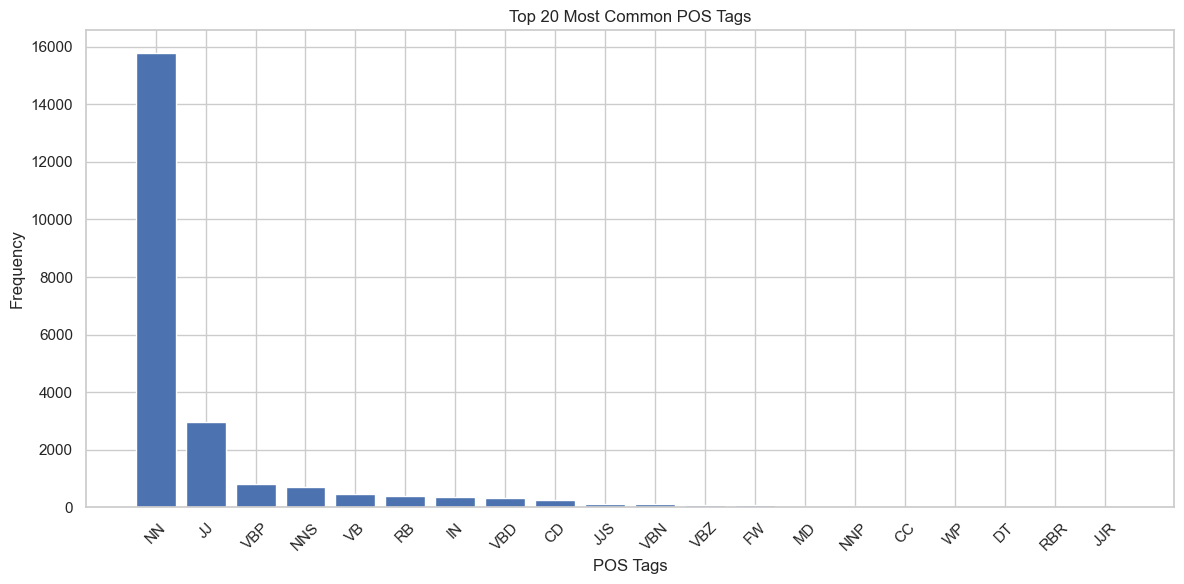

In [159]:
import matplotlib.pyplot as plt

flat_tags = [tag for tags in pos_tagings for tag in tags]
# Create a frequency distribution of POS tags
pos_freq = nltk.FreqDist(tag for word, tag in flat_tags)

# Get the most common POS tags (e.g., top 20)
most_common_tags = pos_freq.most_common(20)

# Extract the tags and their frequencies
tags, frequencies = zip(*most_common_tags)

# Create a bar plot
plt.figure(figsize=(12, 6)) 
plt.bar(tags, frequencies)
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common POS Tags')
plt.xticks(rotation=45) 

# Show the plot
plt.tight_layout()
plt.show()

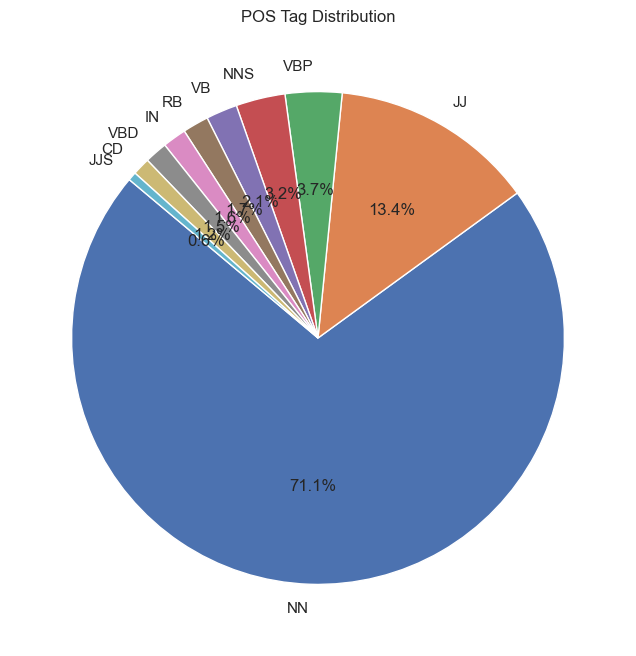

In [160]:
# calculate each pos tag occurance percentage present by piechart
from collections import Counter
import seaborn as sns

pos_tags=[tag for word_tag in pos_tagings for _,tag in word_tag]

tag_counts=Counter(pos_tags)

commom_10=tag_counts.most_common(10)

# total_tags=len(pos_tags)
# percentages=[(tag,count/total_tags*100) for tag,count in tag_counts.items()]
tags,values=zip(*commom_10)

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")  # Add a white grid background
plt.pie(values, labels=tags, autopct='%0.1f%%', startangle=140)
plt.title('POS Tag Distribution')

# Display the pie chart
plt.show()


In [189]:
#claculate length of each sentence 
def calculate_length_of_text(text):
    length=len(text)
    return length
text_len=df['commentText'].apply(calculate_length_of_text)

for index, length in enumerate(text_len):
    comment = df['commentText'].iloc[index]
    print(f'Comment: "{comment}" - Length: {length}')

Comment: "pudina ptta dalu" - Length: 16
Comment: "chiken kacha ni ga sis" - Length: 22
Comment: "hello mam love recip ingredi easili avail way explain good" - Length: 58
Comment: "awesom recip plzz make handi chicken handi" - Length: 42
Comment: "measur" - Length: 6
Comment: "kabita mam egg biryani everyon hous love thank delici recip" - Length: 59
Comment: "cooker" - Length: 6
Comment: "bhot ach lagi apki respi mene subscrib kardia bhot ach" - Length: 54
Comment: "mam dahi k jgh p kr skte h" - Length: 26
Comment: "wooooooo yummmmmm love" - Length: 22
Comment: "perfect biryani recip apko follow k acchi biryani" - Length: 49
Comment: "didi alway curious biryani made thank put detail video weekend serv famili motivati" - Length: 83
Comment: "thanx respect madam appn tel dala" - Length: 33
Comment: "made tast awesom thank kabita" - Length: 29
Comment: "amaz" - Length: 4
Comment: "nice video" - Length: 10
Comment: "recip cokar hepleas zarur repli kijiy ga" - Length: 40
Comment: "mam chawa

In [204]:
# calculate for each word occurace in dataset 
from collections import Counter

def calculate_word_frequency(text):
    word_count = Counter(text.split())  #here split the text into words and count their occurrences
    return word_count

count_frequency = Counter()  # initialize an empty Counter to calculate word counts

# Iterate through the 'commentText' column and calculate word counts
for text in df['commentText']:
    word_count = calculate_word_frequency(text)
    count_frequency += word_count

# Print word occurrence
for word, occurrence in count_frequency.items():
    print(f"{word}: {occurrence}")



pudina: 10
ptta: 2
dalu: 7
chiken: 44
kacha: 7
ni: 34
ga: 18
sis: 12
hello: 54
mam: 815
love: 261
recip: 883
ingredi: 26
easili: 10
avail: 9
way: 69
explain: 60
good: 221
awesom: 153
plzz: 13
make: 173
handi: 6
chicken: 269
measur: 6
kabita: 381
egg: 7
biryani: 329
everyon: 18
hous: 7
thank: 975
delici: 109
cooker: 68
bhot: 27
ach: 15
lagi: 10
apki: 41
respi: 7
mene: 27
subscrib: 16
kardia: 2
dahi: 26
k: 103
jgh: 4
p: 4
kr: 30
skte: 28
h: 204
wooooooo: 1
yummmmmm: 1
perfect: 31
apko: 14
follow: 48
acchi: 21
didi: 68
alway: 36
curious: 1
made: 89
put: 18
detail: 10
video: 249
weekend: 7
serv: 16
famili: 32
motivati: 1
thanx: 34
respect: 1
madam: 52
appn: 1
tel: 5
dala: 23
tast: 93
amaz: 66
nice: 829
cokar: 1
hepleas: 1
zarur: 3
repli: 51
kijiy: 3
chawal: 20
g: 20
rice: 100
oil: 51
dale: 8
masha: 3
allah: 6
yummi: 221
thing: 10
like: 198
show: 19
step: 36
one: 59
cook: 290
look: 57
beauti: 25
friend: 5
post: 12
dubai: 2
curd: 24
skip: 12
maa: 6
bariyani: 2
masala: 137
ensabko: 1
merin: 1

In [205]:
from collections import Counter

def calculate_word_percent(text):
    word_count = Counter(text.split())  # here split the text into words and count their occurrences
    return word_count

count_frequency = Counter()  # initialize an empty Counter to calculate word counts
total_word_count = 0  # to calculate the total number of words in the dataset

# Iterate through the 'commentText' column and calculate word counts
for text in df['commentText']:
    word_count = calculate_word_percent(text)
    count_frequency += word_count
    total_word_count += len(text.split())

# Print word occurrence and occurrence percentage
for word, occurrence in count_frequency.items():
    occurrence_percentage = (occurrence / total_word_count) * 100
    print(f"{word}: {occurrence} (Percen: {occurrence_percentage:.2f}%)")

pudina: 10 (Percen: 0.04%)
ptta: 2 (Percen: 0.01%)
dalu: 7 (Percen: 0.03%)
chiken: 44 (Percen: 0.19%)
kacha: 7 (Percen: 0.03%)
ni: 34 (Percen: 0.15%)
ga: 18 (Percen: 0.08%)
sis: 12 (Percen: 0.05%)
hello: 54 (Percen: 0.24%)
mam: 815 (Percen: 3.60%)
love: 261 (Percen: 1.15%)
recip: 883 (Percen: 3.90%)
ingredi: 26 (Percen: 0.11%)
easili: 10 (Percen: 0.04%)
avail: 9 (Percen: 0.04%)
way: 69 (Percen: 0.30%)
explain: 60 (Percen: 0.26%)
good: 221 (Percen: 0.98%)
awesom: 153 (Percen: 0.68%)
plzz: 13 (Percen: 0.06%)
make: 173 (Percen: 0.76%)
handi: 6 (Percen: 0.03%)
chicken: 269 (Percen: 1.19%)
measur: 6 (Percen: 0.03%)
kabita: 381 (Percen: 1.68%)
egg: 7 (Percen: 0.03%)
biryani: 329 (Percen: 1.45%)
everyon: 18 (Percen: 0.08%)
hous: 7 (Percen: 0.03%)
thank: 975 (Percen: 4.30%)
delici: 109 (Percen: 0.48%)
cooker: 68 (Percen: 0.30%)
bhot: 27 (Percen: 0.12%)
ach: 15 (Percen: 0.07%)
lagi: 10 (Percen: 0.04%)
apki: 41 (Percen: 0.18%)
respi: 7 (Percen: 0.03%)
mene: 27 (Percen: 0.12%)
subscrib: 16 (Perce

In [206]:
from collections import Counter

def calculate_word_frequency(text):
    word_count = Counter(text.split())  # Split the text into words and count their occurrences
    return word_count

count_frequency = Counter()  # Initialize an empty Counter to calculate word counts

# Iterate through the 'commentText' column and calculate word counts
for text in df['commentText']:
    word_count = calculate_word_frequency(text)
    count_frequency += word_count

# Find the word with the maximum occurrence
max_word, max_occurrence = count_frequency.most_common(1)[0]

print(f"Word with the maximum occurrence: '{max_word}' (Occurrences: {max_occurrence})")


Word with the maximum occurrence: 'thank' (Occurrences: 975)


In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Labels'],bins=range(1,9),align='left',rwidth=0.8)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()

In [ ]:
# create word cloud
from wordcloud import WordCloud
num_labels=7
for label in range(1,num_labels+1):
 plt.figure(figsize=(20,10))
 plt.subplot(2, 4, label) 
 wc=WordCloud(max_words=700,background_color='black')
 wc.generate(' '.join(word for word in df.loc[df['Labels']==num_labels,'commentText']))
 plt.imshow(wc)
 plt.axis('off')
 plt.show()

In [ ]:
from nltk.corpus import words
nltk.download('words')

english_word_set=set(words.words())
def segregate_english_words(text):
   english_words=[]
   words = text.split()
   for word in words:
       if word.lower() in english_word_set:
            english_words.append(word)
       
   return ' '.join(english_words)

df['english_text']=df['commentText'].apply(segregate_english_words)   

In [ ]:
df

In [ ]:
def segregate_non_english_words(text):
    words = text.split()
    non_english_words = []

    for word in words:
        # Check if the lowercase version of the word is NOT in the set of English words
        if word.lower() not in english_word_set:
            non_english_words.append(word)

    return ' '.join(non_english_words)
df['non_english_text'] = df['commentText'].apply(segregate_non_english_words)

In [ ]:
df

In [10]:
import numpy as np
X=df['commentText']
y=df['Labels']

In [11]:
X.iloc[:50]


0                                  pudina ptta nhi dalu
1                         chiken kacha tu ni rhi ga sis
2     hello mam love recip ingredi easili avail way ...
3            awesom recip plzz make handi chicken handi
4               yeh jo measur hai kitn logon ke liy hai
5     kabita mam tri ur egg biryani everyon hous lov...
6                                    cooker kar sakt na
7     mujh bhot ach lagi apki respi mene subscrib ka...
8               mam dahi k jgh p kuch use kr skte h kya
9                                wooooooo yummmmmm love
10    perfect biryani recip apko follow kar k banaya...
11    hi didi alway curious biryani made thank much ...
12               thanx respect madam appn tel nahi dala
13                     made tast awesom thank kabita ji
14                                                 amaz
15                                           nice video
16    aur kya recip ko cokar bana sakt hepleas zarur...
17             aur mam ism aap chawal kitn k g u

In [12]:
print(len(X))

4900


In [13]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
lbl=LabelEncoder()
y=lbl.fit_transform(y)
y

array([6, 6, 3, ..., 0, 3, 0], dtype=int64)

In [14]:
# Use Bag of words model 
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer(max_features=10000,ngram_range=(1,2))
# vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

X = X.toarray()

# print("\nCount Vectorized Data:")
# print(X_array)



# from transformers import AutoTokenizer
# tokenizer=AutoTokenizer.from_pretrained('xlm-roberta-base')
# X = tokenizer(X.to_list() ,padding=True,)

# print(X)


In [ ]:
from inltk.inltk import get_embedding_vectors
text=list(X)
language_code='hi-en'

X_vec=get_embedding_vectors(text,language_code)

X_vec= np.array([np.mean(vec, axis=0) for vec in X_vec])

X_vec

In [15]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# 

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
gd=GradientBoostingClassifier()
gd.fit(X_train,Y_train)
y_pred=gd.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.7234693877551021


In [ ]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
y_pred=ada.predict(X_test)
print(accuracy_score(Y_test,y_pred))

In [19]:
ml=MLPClassifier()
ml.fit(X_train,Y_train)
y_pred=ml.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.7326530612244898


In [ ]:
rcv=RidgeClassifier()
rcv.fit(X_train,Y_train)
y_pred=rcv.predict(X_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
mb=MultinomialNB()
mb.fit(X_train,Y_train)
y_pred=mb.predict(X_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
bnb=BernoulliNB()
bnb.fit(X_train,Y_train)
y_pred=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
y_pred=xgb.predict(X_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
cat.fit(X_train,Y_train)
y_pred=cat.predict(X_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression(max_iter=100)
lg.fit(X_train,Y_train)
y_pred=lg.predict(X_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models=[
    ('gbc',GradientBoostingClassifier()),
    ('ada',AdaBoostClassifier()),
    ('mlp',MLPClassifier()),
    ('ridge',RidgeClassifier()),
    ('mb',MultinomialNB()),
    ('rf',RandomForestClassifier()),
    ('bnb',BernoulliNB()),
    ('xg',XGBClassifier())
]

param_grid = {
    'gbc': {
        'clf__n_estimators': [50, 100, 150, 200],
        'clf__max_depth': [2, 5, 10, 15],
    },
    'ada': {
        'clf__n_estimators': [50, 100, 150, 200, 250],
        'clf__algorithm': ['SAMME.R', 'SAMME'],
        'clf__learning_rate': [0.01, 0.001, 1, 0.95, 0.50]
    },
    'mlp': {
        'clf__hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
        'clf__activation': ['tanh', 'relu'],
        'clf__solver': ['sgd', 'adam'],
        'clf__alpha': [0.0001, 0.05, 0.5, 1],
    },
    'ridge': {
        'clf__alpha': [200, 230, 250, 265, 300, 500],
        'clf__max_iter': [10, 100, 150, 180, 200],
        'clf__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    },
    'mb': {
        'clf__alpha': [200, 230, 250, 265, 300, 500]
    },
    'rf': {
        'clf__n_estimators': [10, 50, 100],
        'clf__max_depth': [None, 10, 20],
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_features': ['sqrt', 'log2'],
    },
    'bnb': {
        'clf__alpha': [200, 230, 250, 265, 300, 500]
    },
    'xg': {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [3, 4, 5],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__subsample': [0.8, 0.9, 1.0],
        'clf__colsample_bytree': [0.8, 0.9, 1.0],
        'clf__gamma': [0, 1, 5],
    }
}
  
  
best_models = {}

# Loop through each classifier and its corresponding parameter grid
for model_name, model in models:
    param_grid_for_model = param_grid.get(model_name, {})  # Get the parameter grid for the current model
    if param_grid_for_model:
        pipeline = Pipeline([('clf', model)])  # Create a pipeline with the current classifier
        grid_search = GridSearchCV(pipeline, param_grid_for_model, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, Y_train)  # X_train and y_train are your training data
        best_models[model_name] = {
            'best_model': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
        }

In [ ]:
import nltk

# Download the NLTK data if you haven't already
nltk.download('words')

from nltk.corpus import words

# Create a set of English words for reference
english_word_set = set(words.words())

def segregate_english_words(text):
    words = text.split()
    english_words = []

    for word in words:
        # Check if the lowercase version of the word is in the set of English words
        if word.lower() in english_word_set:
            english_words.append(word)

    return ' '.join(english_words)

# Example usage
hinglish_text = "mam ghee ki jgh refined oil use kr skte he"
english_text = segregate_english_words(hinglish_text)
print(english_text)


In [ ]:
import nltk

# Download the NLTK data if you haven't already
nltk.download('words')

from nltk.corpus import words

# Create a set of English words for reference
english_word_set = set(words.words())

def segregate_english_words(text):
    words = text.split()
    english_words = []

    for word in words:
        # Check if the lowercase version of the word is in the set of English words
        if word.lower() in english_word_set:
            english_words.append(word)

    return ' '.join(english_words)

# Example usage
hinglish_text = "mam khana lamba prose chhota aasan btaiy plzz"
english_text = segregate_english_words(hinglish_text)
print(english_text)


In [186]:
def calculate_word_frequency(text):
    word_count = Counter(text.split())  # Split the text into words and count their occurrences
    return word_count

# Calculate word frequencies for each comment and create a new column 'word_freq'
df['word_fre'] = df['commentText'].apply(calculate_word_frequency)

df

,commentText,Labels,word_freq,word_fre
0,pudina ptta dalu,7,"{'pudina': 1, 'ptta': 1, 'dalu': 1}","{'pudina': 1, 'ptta': 1, 'dalu': 1}"
1,chiken kacha ni ga sis,7,"{'chiken': 1, 'kacha': 1, 'ni': 1, 'ga': 1, 's...","{'chiken': 1, 'kacha': 1, 'ni': 1, 'ga': 1, 's..."
2,hello mam love recip ingredi easili avail way ...,4,"{'hello': 1, 'mam': 1, 'love': 1, 'recip': 1, ...","{'hello': 1, 'mam': 1, 'love': 1, 'recip': 1, ..."
3,awesom recip plzz make handi chicken handi,2,"{'awesom': 1, 'recip': 1, 'plzz': 1, 'make': 1...","{'awesom': 1, 'recip': 1, 'plzz': 1, 'make': 1..."
4,measur,7,{'measur': 1},{'measur': 1}
...,...,...,...,...
4895,love chole thank kabitaji share recip wait see...,1,"{'love': 1, 'chole': 2, 'thank': 1, 'kabitaji'...","{'love': 1, 'chole': 2, 'thank': 1, 'kabitaji'..."
4896,thnakyou mm,1,"{'thnakyou': 1, 'mm': 1}","{'thnakyou': 1, 'mm': 1}"
4897,thank mam,1,"{'thank': 1, 'mam': 1}","{'thank': 1, 'mam': 1}"
4898,fabul,4,{'fabul': 1},{'fabul': 1}
